# Basic Implementation of Logistic Regression to Predict Gender from Height and Weight Data

The objective of this program is to use a logisitc regression classifier on a simple dataset of heights and weights to demonstrate some of the principal characteristics of this type of classifier. The target variable is gender and we aim to use the height and weight data to classify samples as either male or female.

We begin by importing the data into a dataframe, converting the height from inches to cm and generating some histograms.

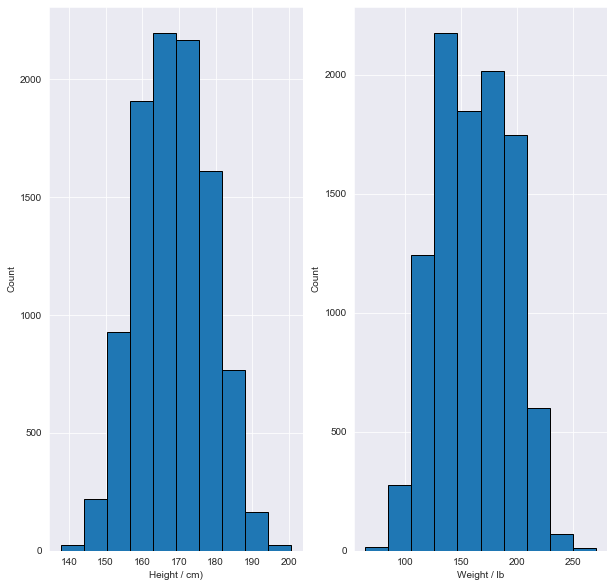

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('gender_height_weight.csv')
# convert height to cm
df['Height'] = df['Height']*2.54

# generate histograms
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(121)
ax.set_xlabel('Height / cm)')
ax.set_ylabel('Count')
ax.hist(df['Height'], ec = 'k')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Weight / lb')
ax2.set_ylabel('Count')
ax2.hist(df['Weight'], ec = 'k')
plt.show()

We can see that the data is approximately normally distributed. 

We will employ one-hot encoding to generate binary values for the categorical gender data and add to the dataframe as a new column. Then we generate a correlation matrix for the height and weight data.

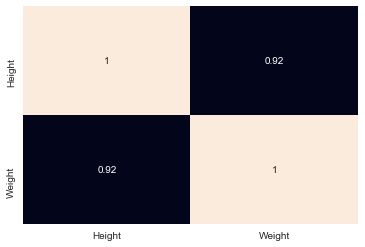

In [65]:
# generate dummy variables for 'Gender' column
gender_data = pd.get_dummies(df['Gender'], drop_first = True)
# add new column to the data frame
df = pd.concat([df, gender_data], axis = 1)
# assign data
X = df[['Height', 'Weight']]
y = df['Male']
# compute and visualise correlation matrix of height and weight
corr_matrix = X.corr()
fig = plt.figure()
sns.heatmap(corr_matrix, annot = True, cbar = False)
plt.show()

It is evident that there exists a highy-correlated relationship between height and weight.

Now we split the data into training and testing sets, create a classifier and fit it to the training data. Then we can make predictions on the test set and generate the confusion matrix and classification report.

In [62]:
# split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# create logistic regressor with default regularisation
log_reg = LogisticRegression(solver = 'liblinear')
# fit model to the training data
log_reg.fit(X_train, y_train)
# predict the labels of the test data (y_test)
y_pred = log_reg.predict(X_test)

# compute and print the confusion matrix and classification report
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report:')
print(classification_report(y_test, y_pred))

Confusion matrix:
[[917  84]
 [ 89 910]]


Classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1001
           1       0.92      0.91      0.91       999

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



It is evident that we can place a high degree of confidence in the predictive ability of our classifier.

The logistic regression decision boundary occurs at  $\Theta^TX = \theta_0+\theta_1x_1+\theta_2x_2... = 0$, where $\Theta$ is the coefficient vector and $X$ is the feature vector. Therefore, we can retrieve the coefficients and intercept to plot the decision boundaries.

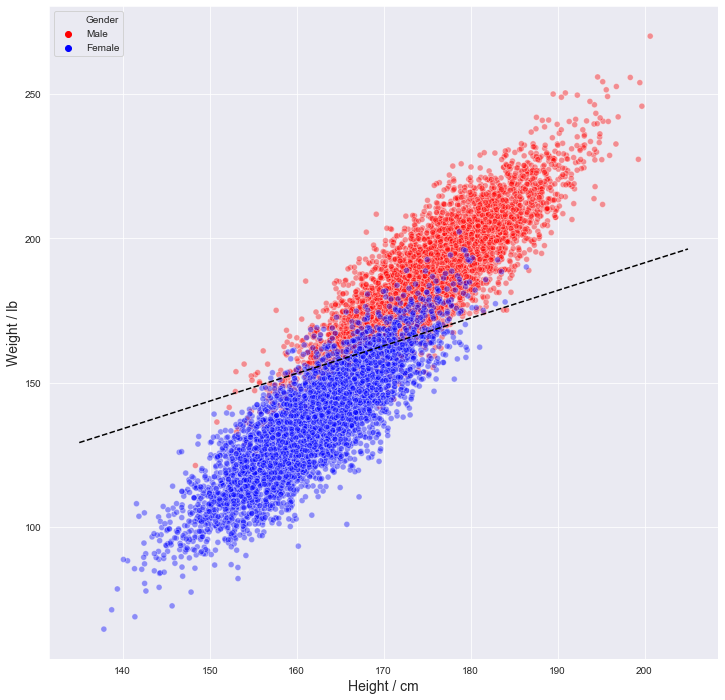

In [63]:
# retrieve coefficient and intercept values: (a*x_1 + b*x_2 + c = 0)
a, b = log_reg.coef_[0][0], log_reg.coef_[0][1]
c = log_reg.intercept_[0]
# create x1 points for plot
x1 = np.linspace(135, 205, 100)
# rearrange the decision boundary equation to plot for x2
x2_plot = -(a/b)*x1 - (c/b)
                       
# plot data and decision boundary
fig = plt.figure(figsize = (12, 12))
plot_data = df.drop('Male', axis = 1)
sns.set_style('darkgrid')
ax3 = sns.scatterplot(data = plot_data, x = 'Height', y = 'Weight', hue = 'Gender',
                      palette = ['red', 'blue'], alpha = 0.4)
ax3.set_xlabel('Height / cm', fontsize = 14)
ax3.set_ylabel('Weight / lb', fontsize = 14)
ax3.plot(x1, x2_plot, color = 'k', linestyle = 'dashed')
plt.show()

To finish off we add the heights and weights of two new people and predict their genders with the model.

In [64]:
# predict classification of person 1: 189cm and 200lb and person 2: 160cm and 137lb
new_candidates = {'Height': [189, 160], 'Weight': [200, 137]}
new_df = pd.DataFrame(new_candidates)
predictions = log_reg.predict(new_df)
gender_dict = {0: 'Female', 1: 'Male'}
print('Person 1 is predicted to be {} and person 2 is predicted to be {}'.format(gender_dict[predictions[0]], 
                                                                                 gender_dict[predictions[1]]))


Person 1 is predicted to be Male and person 2 is predicted to be Female
